# 비트코인 데이터 분석
url = https://bitcoincharts.com/charts/bitstampUSD#rg60ztgSzm1g10zm2g25zv

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from selenium.webdriver.common.action_chains import ActionChains

import time

%matplotlib inline

In [3]:
driver = webdriver.Chrome('../driver/chromedriver_win_v103.exe')

c:\Users\Newrandom_Asus\miniconda3\envs\fbpp\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [5]:
driver.get('https://bitcoincharts.com/charts/bitstampUSD#rg{}ztgSzm1g10zm2g25zv'.format(730))       # {} : 30, 60, 90, ... 기간임

In [7]:
from selenium.webdriver.common.by import By

In [8]:
# raw_data 얻기 버튼 클릭하기 >>

xpath = '//*[@id="content_chart"]/div/div[2]/a'
variable = driver.find_element(By.XPATH, xpath)
driver.execute_script('return arguments[0].scrollIntoView();', variable)
variable.click()

In [9]:
# raw_data table 가져오기
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
table = soup.find('table', 'data')
# table

<table class="data" id="chart_table" style="display: table;">
<thead>
<tr>
<th>Timestamp</th><th>Open</th><th>High</th><th>Low</th><th>Close</th><th>Volume (BTC)</th><th>Volume (Currency)</th><th>Weighted Price</th>
</tr>
</thead>
<tbody>
<tr><td>2020-08-05 00:00:00</td><td>11193.48</td><td>11795.86</td><td>11094.35</td><td>11755.24</td><td>7514.79</td><td>86847559.79</td><td>11556.88</td></tr><tr><td>2020-08-06 00:00:00</td><td>11759.9</td><td>11913.5</td><td>11575.57</td><td>11770.08</td><td>9855.99</td><td>115864299.62</td><td>11755.72</td></tr><tr><td>2020-08-07 00:00:00</td><td>11770.26</td><td>11920</td><td>11219</td><td>11600.85</td><td>10503.36</td><td>122342727.37</td><td>11647.96</td></tr><tr><td>2020-08-08 00:00:00</td><td>11601.75</td><td>11817.95</td><td>11527</td><td>11776.9</td><td>3983.75</td><td>46582799.67</td><td>11693.21</td></tr><tr><td>2020-08-09 00:00:00</td><td>11767.93</td><td>11808.28</td><td>11527.92</td><td>11683.03</td><td>2649.49</td><td>30909847.9</td><td

In [10]:
df = pd.read_html(str(table))
bitcoin = df[0]
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2020-08-05 00:00:00,11193.48,11795.86,11094.35,11755.24,7514.79,8.684756e+07,11556.88
1,2020-08-06 00:00:00,11759.90,11913.50,11575.57,11770.08,9855.99,1.158643e+08,11755.72
2,2020-08-07 00:00:00,11770.26,11920.00,11219.00,11600.85,10503.36,1.223427e+08,11647.96
3,2020-08-08 00:00:00,11601.75,11817.95,11527.00,11776.90,3983.75,4.658280e+07,11693.21
4,2020-08-09 00:00:00,11767.93,11808.28,11527.92,11683.03,2649.49,3.090985e+07,11666.34


In [11]:
# 데이터 저장
bitcoin.to_csv('../data_fbprophet/05_bitcoin_history_user.csv', sep=',')

In [12]:
bitcoin = pd.read_csv('../data_fbprophet/05_bitcoin_history_user.csv', index_col=0)
bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2020-08-05 00:00:00,11193.48,11795.86,11094.35,11755.24,7514.79,8.684756e+07,11556.88
1,2020-08-06 00:00:00,11759.90,11913.50,11575.57,11770.08,9855.99,1.158643e+08,11755.72
2,2020-08-07 00:00:00,11770.26,11920.00,11219.00,11600.85,10503.36,1.223427e+08,11647.96
3,2020-08-08 00:00:00,11601.75,11817.95,11527.00,11776.90,3983.75,4.658280e+07,11693.21
4,2020-08-09 00:00:00,11767.93,11808.28,11527.92,11683.03,2649.49,3.090985e+07,11666.34


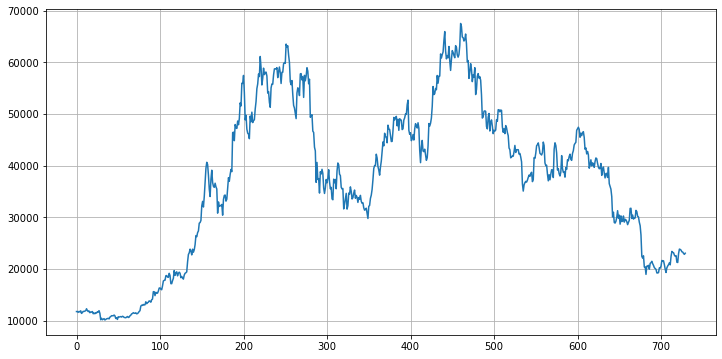

In [14]:
bitcoin['Close'].plot(figsize=(12,6), grid=True);

In [15]:
df = pd.DataFrame({'ds':bitcoin['Timestamp'], 'y':bitcoin['Close']})
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

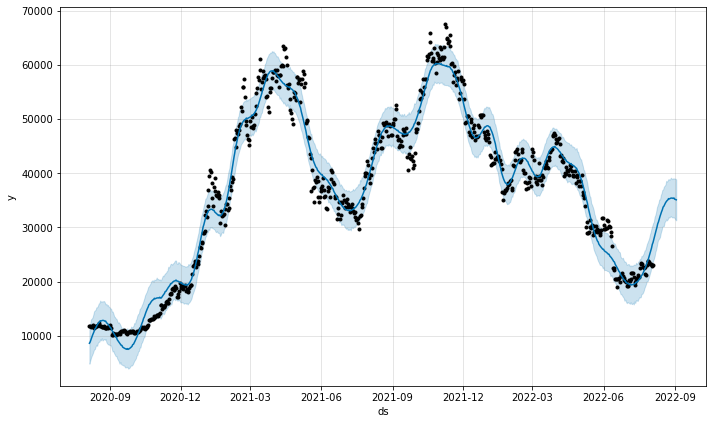

In [16]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

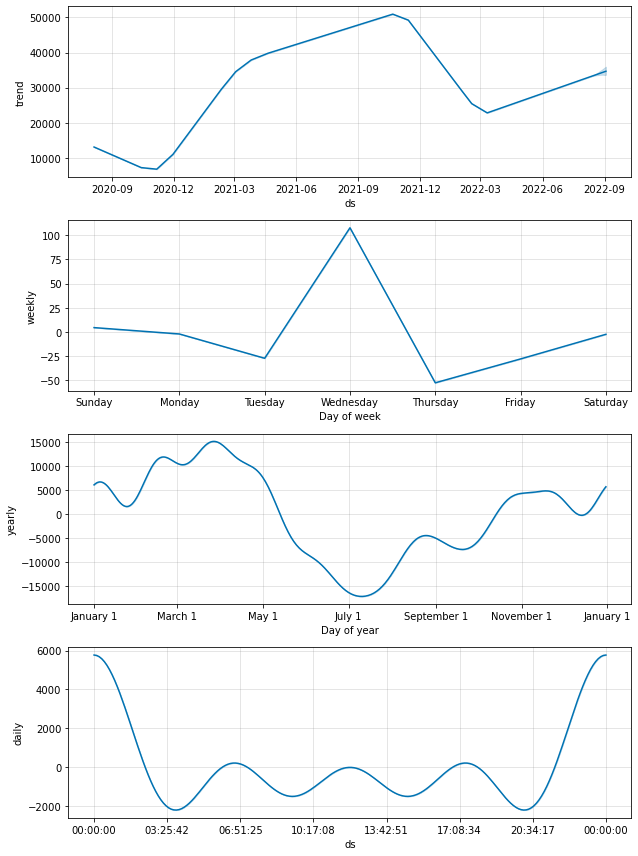

In [17]:
m.plot_components(forecast);

In [18]:
driver.close()